In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Loading the Dataset using Kaggle API**

In [ ]:
!kaggle datasets download -d sushantshetty/shabd-complete-hindi-characters-dataset

100% 346M/346M [00:19<00:00, 16.9MB/s]
100% 346M/346M [00:19<00:00, 18.7MB/s]


# **Unzipping the Files**

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/shabd-complete-hindi-characters-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

# **Importing the required Modules**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,BatchNormalization,Dropout
from keras.models import Sequential

In [ ]:
train_ds = pd.read_csv('/content/train(grayscale).csv')
test_ds = pd.read_csv('/content/test(grayscale).csv')

In [ ]:
train_ds.sample(50)

,Index,label,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023,f_1024
243193,725,हौ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
203966,701,लै,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
35933,773,घू,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
104390,486,णु,255,255,255,255,253,250,247,248,...,255,255,255,255,255,255,255,255,255,255
175181,145,भो,255,255,255,255,255,255,255,255,...,254,254,254,255,255,255,255,255,255,255
48743,465,छा,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
148550,218,पि,255,255,255,255,254,252,250,252,...,255,255,255,255,255,255,255,255,255,255
82766,235,ठे,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
101533,235,णः,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
184849,670,यं,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


# **Preprocessing the dataset**

In [ ]:
len(train_ds['label'].unique())

384

In [ ]:
labels = train_ds['label'].unique().tolist()
idx = [x for x in range(len(labels))]

train_ds['label'].replace(labels, idx, inplace=True)
test_ds['label'].replace(labels, idx, inplace=True)

In [ ]:
train_ds.sample(30)

Taking out labels columns as the output and the rest columns except Index as the input.

In [ ]:
y_train=train_ds.iloc[:,1]
X_train=train_ds.iloc[:,2:]

In [ ]:
y_train

0           0
1           0
2           0
3           0
4           0
         ... 
243451    383
243452    383
243453    383
243454    383
243455    383
Name: label, Length: 243456, dtype: int64

# Scaling the pixels between 0 and 1

In [ ]:
X_train=X_train/255.0

In [ ]:
y_test=test_ds.iloc[:,1]
X_test=test_ds.iloc[:,2:]

In [ ]:
X_test=X_test/255.0

In [ ]:
y_test

0          0
1          0
2          0
3          0
4          0
        ... 
60667    383
60668    383
60669    383
60670    383
60671    383
Name: label, Length: 60672, dtype: int64

# Creating the model

In [ ]:
model=Sequential()

model.add(Dense(512,activation='relu',input_dim=1024))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(384,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 384)               196992    
                                                                 
Total params: 723840 (2.76 MB)
Trainable params: 722816 (2.76 MB)
Non-trainable params: 1024 (4.00 KB)
_________________________________________________________________


# Training the Model

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
7608/7608 [==============================] - 51s 6ms/step - loss: 0.8327 - accuracy: 0.7853 - val_loss: 1.7901 - val_accuracy: 0.5769
Epoch 2/10
7608/7608 [==============================] - 52s 7ms/step - loss: 0.4749 - accuracy: 0.8575 - val_loss: 3.3367 - val_accuracy: 0.4199
Epoch 3/10
7608/7608 [==============================] - 45s 6ms/step - loss: 0.4523 - accuracy: 0.8623 - val_loss: 1.5993 - val_accuracy: 0.6204
Epoch 4/10
7608/7608 [==============================] - 55s 7ms/step - loss: 0.4597 - accuracy: 0.8593 - val_loss: 0.9016 - val_accuracy: 0.7441
Epoch 5/10
7608/7608 [==============================] - 61s 8ms/step - loss: 0.4507 - accuracy: 0.8615 - val_loss: 0.7276 - val_accuracy: 0.7809
Epoch 6/10
7608/7608 [==============================] - 57s 8ms/step - loss: 0.4473 - accuracy: 0.8621 - val_loss: 0.7433 - val_accuracy: 0.7834
Epoch 7/10
7608/7608 [==============================] - 59s 8ms/step - loss: 0.4421 - accuracy: 0.8641 - val_loss: 0.7634 - val_ac

# Plotting graphs of Accuracy and Loss

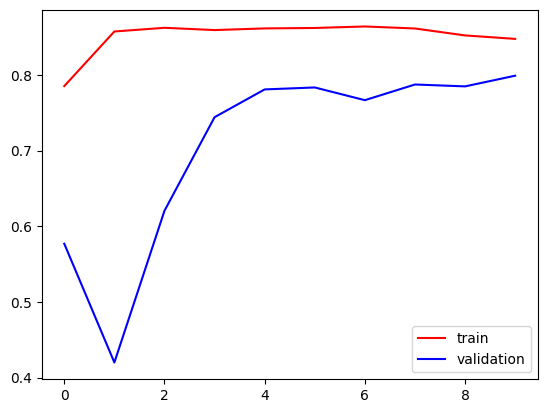

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

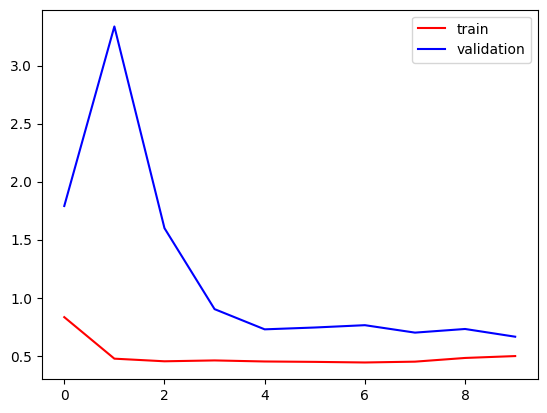

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()